# Trabajo Práctico N°04 - Señales y Sistemas 2

Utilizaremos la libreria OpenCV para realizar este TP.

Para instalar OpenCV:

```shell
$ pip3 install opencv-python --user
$ pip3 install opencv-contrib-python --user
```
Documentacion: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import cv2

# mostrar imágenes y figuras inline
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10, 10

Para cargar una imagen a memoria se utiliza el motodo imread de OpenCV. Para visualizarla, podemos utilizar matplotlib.

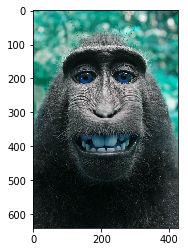

In [2]:
img = cv2.imread('img/selfie.jpg')
plt.imshow(img)

**Problema??** OpenCV utiliza el formato BGR (Blue Green Red) para almacenar la información de una imagen. En cambio, matplotlib, utiliza el formato RGB.

OpenCV tiene la funcion convertToColor (cvtColor) para realizar el paso de un formato a otro.

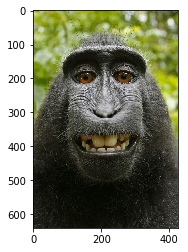

In [3]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Acceso a los valores de los pixeles de la imagen:

In [4]:
px = img[100,100] 
print(px)

[116 177 163]


Acceso a las propiedades de la imagen:

In [5]:
print(img.shape)  # tamaño (alto, ancho, canales)
print(img.size)   # número de pixeles
print(img.dtype)  # tipo

(640, 426, 3)
817920
uint8


ROI (Region of interest) - Recortar:

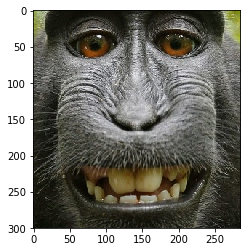

In [6]:
crop = img[150:450, 70:-70]
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

Alamacenar Imagen en distintos formatos:

In [7]:
cv2.imwrite("images/crop.jpg", crop)
cv2.imwrite("images/crop.png", crop)
cv2.imwrite("images/crop.tif", crop)
cv2.imwrite("images/crop.pnm", crop)

False

Tambien podemos trabajar y visualizar cada uno de los canales individuales de la imagen:

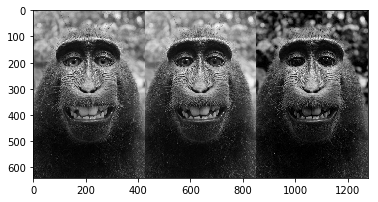

In [8]:
img_r, img_g, img_b = img_rgb[..., 0], img_rgb[..., 1], img_rgb[..., 2]
tile = np.hstack([img_r, img_g, img_b])
plt.imshow(tile, cmap='gray')

## Correlación Cruzada
Para utilizar un filtro de correlación cruzada en una imagen, hay que readaptar su definición a las caracteristicas de una imangen.

Dadas dos funciones discretas:
$$G=H \otimes F$$
donde:
$$G[i]=\frac{1}{\sum_{u=-k}^k\sum_{v=-k}^kH[u,v]}\sum_{u=-k}^{k}\sum_{v=-k}^{k}H[u,v]F[i+u,j+v]$$


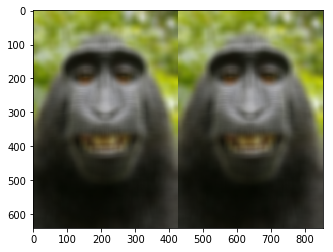

In [9]:
# suavizado con un filtro box
kernel = np.ones((25, 25), np.float32)
kernel /= kernel.sum()
res = cv2.filter2D(img, -1, kernel, cv2.BORDER_REPLICATE)

# en este caso también se puede usar:
res2 = cv2.blur(img, (25,25), cv2.BORDER_REPLICATE)

tile = np.hstack([cv2.cvtColor(res, cv2.COLOR_BGR2RGB),
                  cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)])
plt.imshow(tile)

## Convolución
Ocurre lo mismo para la convolución. Dadas dos funciones discretas:
$$G=H \star F$$
donde:
$$G[i]=\frac{1}{\sum_{u=-k}^k\sum_{v=-k}^kH[u,v]}\sum_{u=-k}^{k}\sum_{v=-k}^{k}H[u,v]F[i-u,j-v]$$

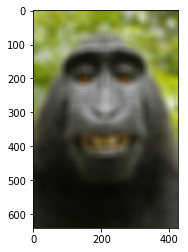

In [10]:
# suavizado con un filtro box (Convolución)
kernel = np.ones((25, 25), np.float32)
kernel /= kernel.sum()
kernel = np.flip(kernel,0) #Realizo un flip vertical del kernel
kernel = np.flip(kernel,1) #Realizo un flip Hor del kernel
res = cv2.filter2D(img, -1, kernel, cv2.BORDER_REPLICATE)

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

## Suavizado Gaussiano
Uno de los kernels mas utilizado para suavizado de imagenes, es el kernel gaussiano

![fig1](img/04-figura1.png)

El mismo cuenta con solo dos parametros. La media $\mu$, que representa la posicion donde esta centrada la campana, y la desviación estandar $\sigma$, que representa la dispersion de la función. Se debe tener encuenta, que al ser una distribucion de probabilidad, siempre el area debajo de la curva es igual a 1.

![fig2](img/04-figura2.png)

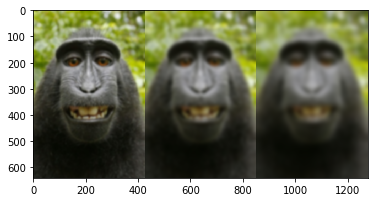

In [11]:
#parametros: imagen_fuente, tamaño_kernel, sigmaX, sigmaY (opcional), tratamientos de bordes
#si tamaño del kernel es (0,0) el mismo es calculado a partir de sigmaX y sigmaY
#si solo se provee sigmaX -> sigmaY = sigmaX
res_sigma3 = cv2.GaussianBlur(img,(0,0),3,cv2.BORDER_REPLICATE)
res_sigma6 = cv2.GaussianBlur(img,(0,0),6,cv2.BORDER_REPLICATE)
res_sigma9 = cv2.GaussianBlur(img,(0,0),9,cv2.BORDER_REPLICATE)

tile = np.hstack([cv2.cvtColor(res_sigma3, cv2.COLOR_BGR2RGB),
                  cv2.cvtColor(res_sigma6, cv2.COLOR_BGR2RGB),
                  cv2.cvtColor(res_sigma9, cv2.COLOR_BGR2RGB)])
plt.imshow(tile)

## Gradientes de una imagen
Los gradientes de color en una imagen, son utililes para poder determinar la ubicaciones de bordes, esquinas y estructuras en una imagen.

![fig3](img/04-figura3.png)

La herramienta utilizada para evaluar la velocidad de cambio de intensidad en una imagen (Gradiente) es la primera derivada de una función 

![fig4](img/04-figura4.png)

Pero esta es una situación bastante cercada a la ideal. Normalmente, una imagen posee ruido. Si probamamos derivar una señal con ruido el resultado no va a ser bastante bueno.

![fig5](img/04-figura5.png)

Como se puede ver en la imagen previa, derivando una señal con ruido no nos permite detectar claramente donde se encuentra el punto de mayor gradiente de una señal.

Es aca donde entra en juego la propiedad de diferenciación de la convolución:

$$\frac{\delta}{\delta x}(h\star f)=(\frac{\delta}{\delta x}h) \star f$$

![fig6](img/04-figura6.png)

Este tipo de filtros, son conocidos como *filtros detectores de bordes*.

### Ejemplo

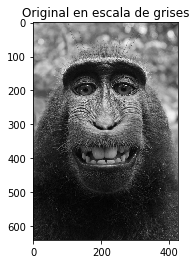

In [12]:
# 1- convierto la imagen a escala de grises 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('Original en escala de grises')
plt.imshow(img_gray, cmap='gray')

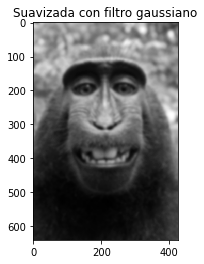

In [13]:
# 2- Aplico un filtro de suavizado gaussiano
img_smoothed = cv2.GaussianBlur(img_gray, (0,0), 3, cv2.BORDER_REPLICATE)
plt.title('Suavizada con filtro gaussiano')
plt.imshow(img_smoothed, cmap='gray')

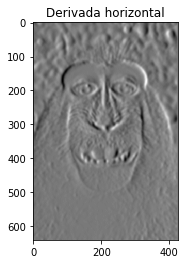

In [14]:
# 3- Derivo con respecto al eje vertical (horizontalmente)
sobel_horizontal = cv2.Sobel(img_smoothed,cv2.CV_64F,1,0,ksize = 5)
plt.title('Derivada horizontal')
plt.imshow(sobel_horizontal, cmap='gray')

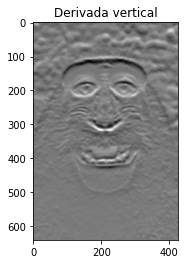

In [15]:
# 4- Derivo con respecto al eje horizontal (verticalmente)
sobel_vertical = cv2.Sobel(img_smoothed,cv2.CV_64F,0,1,ksize=5)
plt.title('Derivada vertical')
plt.imshow(sobel_vertical, cmap='gray')

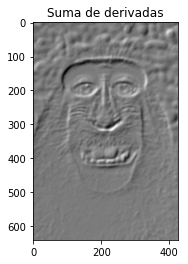

In [16]:
# 5- Sumo ambas derivadas para obtener el resultado final
added_sobel = sobel_horizontal + sobel_vertical
plt.title('Suma de derivadas')
plt.imshow(added_sobel, cmap='gray')

## Ejercicios
1. Seleccionar tres imagenes.
2. Aplicar a las mismas un filtro de suavizado gaussiano y derivar con respecto a $x$ e $y$ (filtro detector de bordes).
3. Graficar resultados paso a paso.

    El procedimiento a seguir es el siguiente:
    1. Tranformar la imagen a escala de grises (función cv2.cvtColor)
    2. Aplicar a la imagen en escala de grises un filtro de suavizado gaussiano
    3. Derivar con respecto a uno de los ejes (función cv2.sovel)
    4. Derivar con respecto a eje restante (función cv2.sovel)
    5. Sumar, punto a punto, ambas derivadas para obtener el resultado final.